In [1]:
# Install required libraries
!pip install pandas numpy matplotlib tbats

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 74.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 93.1 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tbats import TBATS
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [3]:
# Load the data
data = pd.read_csv('IBM2017.csv')

In [4]:
# Ensure the 'Date' column is in datetime format and set it as the index
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

In [5]:
# Prepare the time series data
y = data['Close']  # Target: closing price

In [6]:
# Normalize the target variable
scaler_y = StandardScaler()
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1)).flatten()

In [7]:
# Split the data into training and test sets
train_size = int(len(y_scaled) * 0.8)
y_train_scaled = y_scaled[:train_size]
y_test_scaled = y_scaled[train_size:]

In [8]:
# Fit the TBATS model
model = TBATS()
tbats_model = model.fit(y_train_scaled)

In [9]:
# Forecast the future values
forecast = tbats_model.forecast(steps=len(y_test_scaled))
y_pred_scaled = forecast

In [10]:
# Inverse transform the scaled predictions and actual values
y_test_inv = scaler_y.inverse_transform(y_test_scaled.reshape(-1, 1)).flatten()
y_pred_inv = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()

In [11]:
# Evaluate performance
mse = mean_squared_error(y_test_inv, y_pred_inv)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.1071298763267064


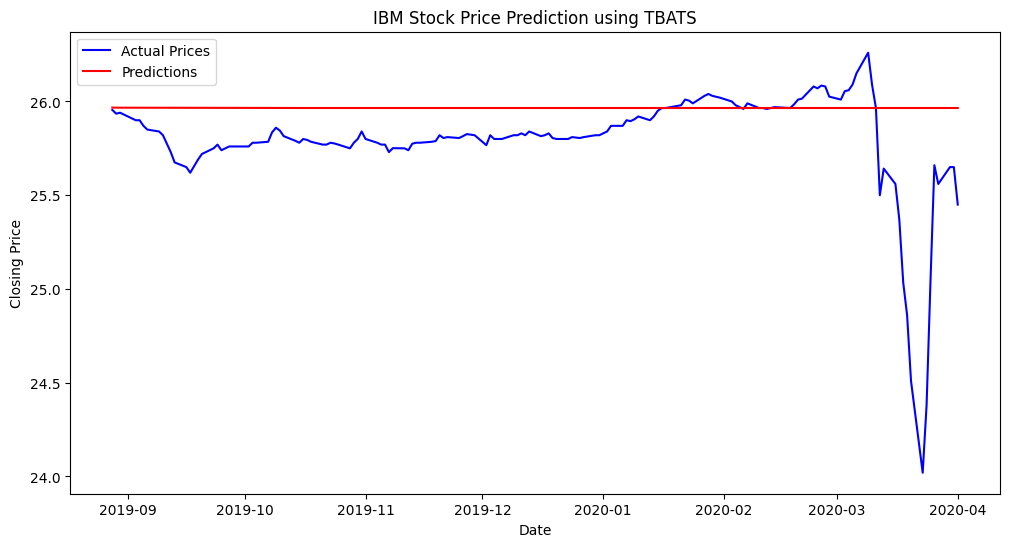

In [12]:
# Plot for visualization of results
plt.figure(figsize=(12, 6))
plt.plot(data.index[-len(y_test_inv):], y_test_inv, label='Actual Prices', color='blue')
plt.plot(data.index[-len(y_pred_inv):], y_pred_inv, label='Predictions', color='red')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('IBM Stock Price Prediction using TBATS')
plt.legend()
plt.show()

Explanation of the Script:

    Install Required Libraries:
        Use !pip install to ensure that pandas, numpy, matplotlib, and tbats are installed.

    Load the Data:
        Load the IBM stock data from IBM2017.csv.

    Prepare the Time Series Data:
        Use the Close column as the target variable.

    Normalize the Target Variable:
        Normalize the closing prices using StandardScaler.

    Split the Data:
        Split the data into training and test sets.

    Fit the TBATS Model:
        Define and fit the TBATS model using the training data.

    Forecast Future Values:
        Forecast the test period and inverse-transform the scaled predictions.

    Evaluate Performance:
        Calculate the Mean Squared Error (MSE) between the actual and predicted values.

    Plot Results:
        Plot the actual vs. predicted closing prices for visualization.

Notes:

    Ensure the file path 'IBM2017.csv' is correct and that the CSV file contains the necessary columns.
    TBATS can handle complex seasonal patterns and is a good choice for data with multiple seasonalities. Adjust model parameters if necessary based on your data's characteristics.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=d6ccbe74-5722-4f84-8e54-7da9a834c88a' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>